In [5]:
#from oml.util import simulate_motor_output
import matplotlib.pyplot as plt
import numpy as np

In [6]:
rng = np.random.default_rng(0)
d = 6  # simulated dimensionality (including flexor bias)
Nf, Nd = 5, 3  # 5 fingers, 3 channels/finger
N = Nf * Nd  # N channels
T = 200  # trial duration

# Mixing matrix

In [16]:
# make a mixing matrix that maps (d-1)-dimensional latent profiles onto N-dimensional force patterns
Aa = rng.standard_normal((N, d-1)) # mixing matrix without
Aa = Aa / (np.linalg.norm(Aa, axis=0, keepdims=True) + 1e-12)

# Flexor bias

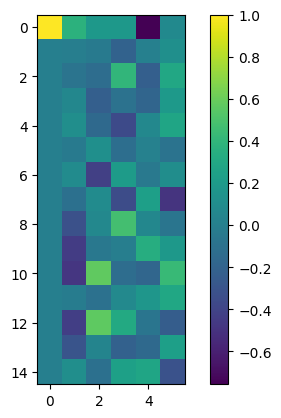

In [21]:
# Simulate flexor bias and add to the mixing matrix (flexion correspond to negative x direction)
flexCh = np.arange(0, Nf, N, dtype=int)
s = np.zeros(N)
bias = .9
s[flexCh] = bias
flexBias = s / np.linalg.norm(s)
A = np.c_[flexBias, Aa]
plt.imshow(A)
plt.colorbar()
plt.show()

# Finger coupling

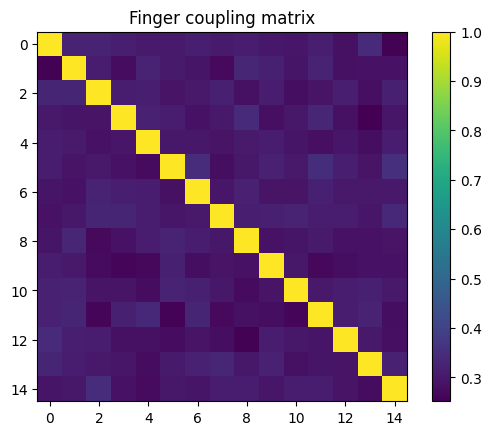

In [32]:
coupling = .3
C = np.full((N, N), coupling, dtype=float)
C += 0.02 * rng.standard_normal((N, N))
np.fill_diagonal(C, 1.0)
plt.imshow(C)
plt.title('Finger coupling matrix')
plt.colorbar()
plt.show()

# Force profile

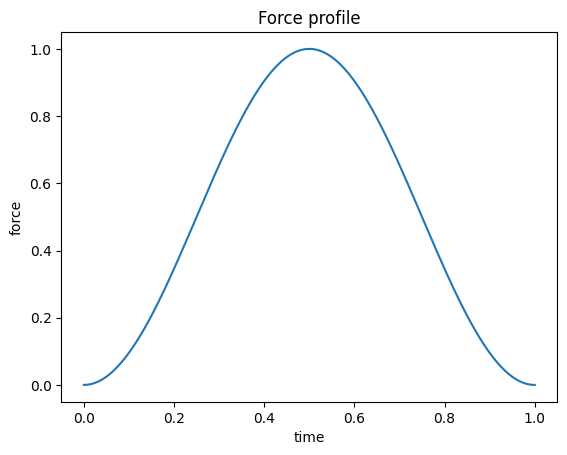

In [16]:
# A simple smooth movement profile (same for all trials; scales change trial-by-trial)
t = np.linspace(0, 1, T)
profile = np.sin(np.pi * t) ** 2  # 0 -> peak -> 0
plt.plot(t, profile)
plt.xlabel('time')
plt.ylabel('force')
plt.title('Force profile')
plt.show()

In [18]:
B = rng.standard_normal((Nf, Nd, d))
Bb = B[0, 0]

# Example trial

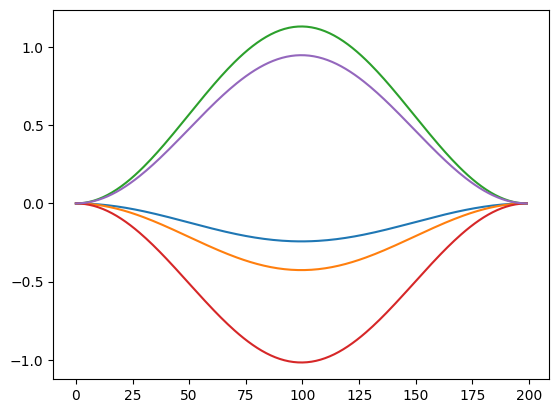

In [43]:
# example trial
f = rng.integers(0, Nf)          # which finger is instructed
v = np.array([1, 0, 0], dtype=float)       # movement direction in 3D
v /= (np.linalg.norm(v) + 1e-12)
amp = 1 + .2 * rng.standard_normal() # movement amplitude
z_vec = v[0] * B[f, 0] + v[1] * B[f, 1] + v[2] * B[f, 2] # (d,)
Z = (amp * profile)[:, None] * z_vec[None, :] # (T, d)
plt.plot(Z)
plt.show()

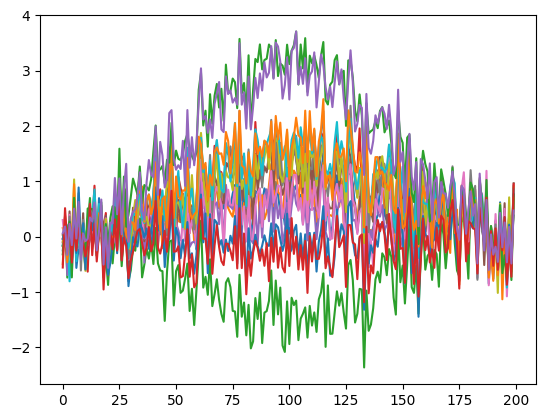

In [44]:
X = Z @ A.T
noise=.3
X += noise * rng.standard_normal(X.shape)
Ft = X @ C.T
plt.plot(Ft)
plt.show()